In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
df = pd.read_csv('../data/full_gross.csv', index_col='Unnamed: 0')

In [4]:
df.head()

,averagerating,numvotes,title,genres,Sport,Fantasy,Mystery,War,Biography,Drama,...,Documentary,Sci-Fi,Action,Thriller,Music,Animation,year,dom_gross,for_gross,world_gross
0,4.2,50352,The Legend of Hercules,"Action,Adventure,Fantasy",False,True,False,False,False,False,...,False,False,True,False,False,False,2014,18800000.0,42400000.0,61200000.0
1,5.1,8296,Baggage Claim,Comedy,False,False,False,False,False,False,...,False,False,False,False,False,False,2013,21600000.0,887000.0,22487000.0
3,7.6,326657,Moneyball,"Biography,Drama,Sport",True,False,False,False,True,True,...,False,False,False,False,False,False,2011,75600000.0,34600000.0,110200000.0
4,6.5,87288,Hereafter,"Drama,Fantasy,Romance",False,True,False,False,False,True,...,False,False,False,False,False,False,2010,32700000.0,72500000.0,105200000.0
5,7.4,428142,Mission: Impossible - Ghost Protocol,"Action,Adventure,Thriller",False,False,False,False,False,False,...,False,False,True,True,False,False,2011,209400000.0,485300000.0,694700000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2966 entries, 0 to 2982
Data columns (total 27 columns):
averagerating    2966 non-null float64
numvotes         2966 non-null int64
title            2966 non-null object
genres           2966 non-null object
Sport            2966 non-null bool
Fantasy          2966 non-null bool
Mystery          2966 non-null bool
War              2966 non-null bool
Biography        2966 non-null bool
Drama            2966 non-null bool
Comedy           2966 non-null bool
History          2966 non-null bool
Crime            2966 non-null bool
Horror           2966 non-null bool
Family           2966 non-null bool
Adventure        2966 non-null bool
Romance          2966 non-null bool
Documentary      2966 non-null bool
Sci-Fi           2966 non-null bool
Action           2966 non-null bool
Thriller         2966 non-null bool
Music            2966 non-null bool
Animation        2966 non-null bool
year             2966 non-null int64
dom_gross        296

In [6]:
low_votes = df[(df['numvotes'] > 250000) | (df['numvotes'] < 1000)].index
df2 = df.drop(low_votes)

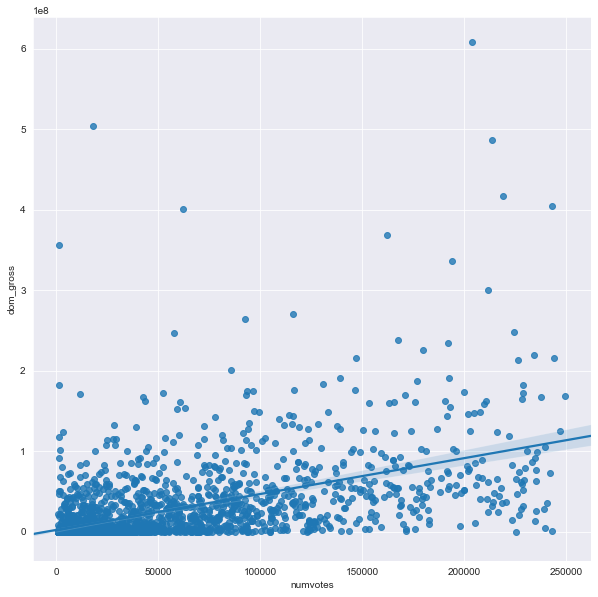

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
sns.regplot(x=df2["numvotes"], y=df2["dom_gross"], fit_reg=True)



In [8]:
df.loc[df['dom_gross'] == df['dom_gross'].max()]

,averagerating,numvotes,title,genres,Sport,Fantasy,Mystery,War,Biography,Drama,...,Documentary,Sci-Fi,Action,Thriller,Music,Animation,year,dom_gross,for_gross,world_gross
144,6.1,43,Avatar,Horror,False,False,False,False,False,False,...,False,False,False,False,False,False,2009,760507625.0,2.015838e+09,2.776345e+09


Text(0.5, 0, 'Movie Average IMDB Rating')

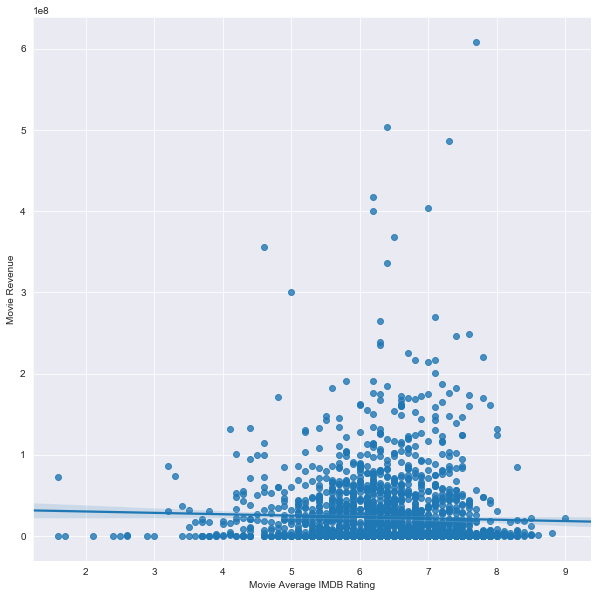

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
sns.regplot(x=df2["averagerating"], y=df2["dom_gross"], fit_reg=True)

plt.title("")
plt.ylabel("Movie Revenue")
plt.xlabel("Movie Average IMDB Rating")

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=df2["dom_gross"], y=df2["numvotes"])

In [ ]:
table1 = pd.pivot_table(df, index=['genres'], values ='dom_gross', aggfunc=['mean','median','std','count'])
table1 = pd.DataFrame(table1)
table1.columns = table1.columns.to_series().str.join('_')
table1 = pd.DataFrame(table1.sort_values('median_dom_gross', ascending=False))
table1 = pd.DataFrame(table1.loc[table1['count_dom_gross']>9].reset_index())
table1.columns = ['genres', 'mean_dom_gross', 'median_dom_gross',
       'std_dom_gross', 'count_dom_gross']
table1[['genres', 'mean_dom_gross', 'median_dom_gross','std_dom_gross','count_dom_gross']].head()

In [ ]:
table2 = pd.DataFrame(table1.sort_values('mean_dom_gross', ascending=False))

In [ ]:
top5_mean = table2.iloc[:5]

In [ ]:
top5_median = table1.iloc[:5]

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=top5_median["genres"], y=top5_median["median_dom_gross"], palette='Blues_r')
plt.ylim(0, 250000000.00)
plt.ylabel('Median Domestic Revenue (Hundred Millions)')
plt.title('What Groups of Genres Drive Revenue?')
plt.xticks(rotation=45)


In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=top5_mean["genres"], y=top5_mean["mean_dom_gross"], palette='Blues_r')
plt.ylim(0, 250000000.00)
plt.ylabel('Mean Domestic Revenue (Hundred Millions)')
plt.title('What Groups of Genres Drive Revenue?')
plt.xticks(rotation=45)

In [ ]:
def genre_descriptive_stats(df, key_col): #key_column will be what we want to run descriptive stats on
    mean = np.ndarray(0)
    median = np.ndarray(0)
    std = np.ndarray(0)

    df_columns_to_use = df.columns[4:-5] #change this as needed

    for i, genre in enumerate(df_columns_to_use):
        mean = np.append(mean, df[key_col].loc[df[genre]].mean())
        median = np.append(median, df[key_col].loc[df[genre]].median())
        std = np.append(std, df[key_col].loc[df[genre]].std())
    d1 = np.append([mean], [median], axis=0)
    d2 = np.append(d1, [std], axis=0)
    d3 = np.transpose(d2)
    descr_stats_df = pd.DataFrame(data=d3, columns=['mean', 'median', 'standard_deviation'], index=list(df_columns_to_use))
    return descr_stats_df

In [ ]:
genre_descriptive_stats(df, 'averagerating')

In [ ]:
genre_descriptive_stats(df, 'numvotes')

In [ ]:
dom_gross_stats = genre_descriptive_stats(df, 'dom_gross')

In [ ]:
top_5_median_dom_gross = dom_gross_stats.sort_values('median', ascending=False)
top_5_median_dom_gross = top_5_median_dom_gross.iloc[:5]
top_5_median_dom_gross

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=top_5_median_dom_gross.index, y=top_5_median_dom_gross["median"], palette='Blues_r')
plt.ylim(0, 250000000.00)
plt.ylabel('Median (Hundred Millions)')
plt.title('What Individual Genre Drives Revenue?')
plt.xticks(rotation=45)

In [ ]:
top_5_mean_dom_gross = dom_gross_stats.sort_values('mean', ascending=False)
top_5_mean_dom_gross = top_5_mean_dom_gross.iloc[:5]
top_5_mean_dom_gross

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=top_5_mean_dom_gross.index, y=top_5_mean_dom_gross["mean"], palette='Blues_r')
plt.ylim(0, 250000000.00)
plt.ylabel('Mean (Hundred Millions)')
plt.title('What Individual Genre Drives Revenue?')
plt.xticks(rotation=45)

In [ ]:
bottom_5_std_dom_gross = dom_gross_stats.sort_values('standard_deviation', ascending=True)
bottom_5_std_dom_gross = bottom_5_std_dom_gross.iloc[:5]
bottom_5_std_dom_gross

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=bottom_5_std_dom_gross.index, y=bottom_5_std_dom_gross["standard_deviation"], palette='Blues_r')
plt.ylim(0, 100000000.00)
plt.ylabel('Standard Deviation (Hundred Millions)')
plt.title('Playing It Safe')
plt.xticks(rotation=45)

In [ ]:
df_dom_gross_asc = df.sort_values('dom_gross', ascending=False)

In [ ]:
table_top_10_dom = df_dom_gross_asc.iloc[:10]

In [ ]:
table_top_10_dom

In [ ]:
pd.DataFrame(table_top_10_dom, columns=('title','genres','dom_gross'))